This notebook analyzes content present in the DIJA 30 Stock Time Series dataset. It provides detailed insight into the stock trends and also includes a guide to train and fit a LSTM model for stock price prediction.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.float_format = '{:.2f}'.format
sns.set(rc={'figure.figsize':(20, 20)})

In [7]:
import sys
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

from tensorflow.python import keras
print("keras version: {}".format(keras.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.22.0
matplotlib version: 2.1.2
NumPy version: 1.14.0
SciPy version: 1.0.0
IPython version: 6.2.1
scikit-learn version: 0.19.1
keras version: 2.1.4-tf
tensorflow version: 1.7.0


In [8]:
df = pd.read_csv('../Datasets/djia/all_stocks_2006-01-01_to_2018-01-01.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


Date - Date for which the price is given
Open - Price of the stock at market open (In USD)
High - Highest price reached in the day
Low - Lowest price reached in the day
Close - Closing price for the day
Volume - Number of shares traded -Name` - the stock's ticker name

In [10]:
df = pd.read_csv('../Datasets/djia/all_stocks_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null datetime64[ns]
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [12]:
df.Date = pd.to_datetime(df.Date)

In [13]:
df.describe()

,Open,High,Low,Close,Volume
count,93587.00,93602.00,93592.00,93612.00,93612.00
mean,85.62,86.39,84.84,85.64,20156670.14
std,108.15,108.96,107.23,108.12,34421077.71
min,6.75,7.17,0.00,6.66,0.00
25%,33.95,34.29,33.60,33.96,5040180.50
50%,60.04,60.63,59.49,60.05,9701141.50
75%,94.00,94.74,93.25,94.01,20752221.50
max,1204.88,1213.41,1191.15,1195.83,843264044.00


The dataset has some missing values. We will analyze this and see how to fix it.

In [14]:
df.isnull().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

The Open column has the maximum number of null values. Let's find the rows for which the values are missing.

In [15]:
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,nan,201.66,nan,201.17,1833625,MMM
5933,2017-07-31,nan,85.70,nan,85.23,3079797,AXP
11972,2017-07-31,nan,nan,nan,242.46,5777271,BA
14992,2017-07-31,nan,nan,nan,113.95,4486013,CAT
18012,2017-07-31,nan,110.00,nan,109.19,7561205,CVX
24051,2017-07-31,nan,nan,45.79,45.84,13622891,KO
25815,2012-08-01,nan,nan,nan,49.14,0,DIS
27071,2017-07-31,nan,110.14,nan,109.93,6815349,DIS
30091,2017-07-31,nan,80.39,nan,80.04,12820175,XOM
33111,2017-07-31,nan,25.69,nan,25.61,30616287,GE


The data is missing only for 31 July, 2017. This could be because:

Let's check the number of business days for which the records as missing.

In [16]:
rng = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')
rng[~rng.isin(df.Date.unique())]

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

There are about 111 days for which the stock price data is missing. This could lead to potential problems with the analysis.

In [17]:
df.groupby('Name').count().sort_values('Date', ascending=False)['Date']

Name
JNJ      3020
JPM      3020
WMT      3020
VZ       3020
UTX      3020
UNH      3020
TRV      3020
PG       3020
PFE      3020
NKE      3020
MMM      3020
MCD      3020
KO       3020
XOM      3020
GE       3020
IBM      3020
HD       3020
GS       3020
AXP      3020
BA       3020
CAT      3020
DIS      3020
CVX      3020
CSCO     3019
AMZN     3019
INTC     3019
AAPL     3019
MSFT     3019
MRK      3019
GOOGL    3019
AABA     3019
Name: Date, dtype: int64

In [18]:
gdf = df[df.Name == 'AABA']
cdf = df[df.Name == 'CAT']

In [19]:
cdf[~cdf.Date.isin(gdf.Date)]

,Date,Open,High,Low,Close,Volume,Name
13147,2010-04-01,63.29,64.20,63.29,63.99,7830447,CAT


Let's check if all the listed companies have an entry on each date.

In [20]:
# Total number of companies
df.Name.unique().size

31

In [21]:
df.groupby('Date').Name.unique().apply(len)

Date
2006-01-03    31
2006-01-04    31
2006-01-05    31
2006-01-06    31
2006-01-09    31
2006-01-10    31
2006-01-11    31
2006-01-12    31
2006-01-13    31
2006-01-17    31
2006-01-18    31
2006-01-19    31
2006-01-20    31
2006-01-23    31
2006-01-24    31
2006-01-25    31
2006-01-26    31
2006-01-27    31
2006-01-30    31
2006-01-31    31
2006-02-01    31
2006-02-02    31
2006-02-03    31
2006-02-06    31
2006-02-07    31
2006-02-08    31
2006-02-09    31
2006-02-10    31
2006-02-13    31
2006-02-14    31
              ..
2017-11-16    31
2017-11-17    31
2017-11-20    31
2017-11-21    31
2017-11-22    31
2017-11-24    31
2017-11-27    31
2017-11-28    31
2017-11-29    31
2017-11-30    31
2017-12-01    31
2017-12-04    31
2017-12-05    31
2017-12-06    31
2017-12-07    31
2017-12-08    31
2017-12-11    31
2017-12-12    31
2017-12-13    31
2017-12-14    31
2017-12-15    31
2017-12-18    31
2017-12-19    31
2017-12-20    31
2017-12-21    31
2017-12-22    31
2017-12-26    31
2017-12-2

This confirms that each company had a stock price entry on each day.

Let us first fill in the null values on date 31 july, 2017 with the values from the previous day(i.e 28th July, 2017)

In [22]:
df.set_index('Date', inplace=True)

#Backfill `Open` column
values = np.where(df['2017-07-31']['Open'].isnull(), df['2017-07-28']['Open'], df['2017-07-31']['Open'])
df['2017-07-31']= df['2017-07-31'].assign(Open=values.tolist())

values = np.where(df['2017-07-31']['Close'].isnull(), df['2017-07-28']['Close'], df['2017-07-31']['Close'])
df['2017-07-31']= df['2017-07-31'].assign(Close=values.tolist())

values = np.where(df['2017-07-31']['High'].isnull(), df['2017-07-28']['High'], df['2017-07-31']['High'])
df['2017-07-31']= df['2017-07-31'].assign(High=values.tolist())

values = np.where(df['2017-07-31']['Low'].isnull(), df['2017-07-28']['Low'], df['2017-07-31']['Low'])
df['2017-07-31']= df['2017-07-31'].assign(Low=values.tolist())

df.reset_index(inplace=True)

In [23]:
df[df.Date == '2017-07-31']

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,200.79,201.66,198.69,201.17,1833625,MMM
5933,2017-07-31,83.88,85.70,83.62,85.23,3079797,AXP
8952,2017-07-31,149.90,150.33,148.13,148.73,19845920,AAPL
11972,2017-07-31,240.82,242.00,238.55,242.46,5777271,BA
14992,2017-07-31,114.45,114.90,113.48,113.95,4486013,CAT
18012,2017-07-31,106.71,110.00,106.36,109.19,7561205,CVX
21031,2017-07-31,31.54,31.59,31.37,31.45,19256428,CSCO
24051,2017-07-31,46.00,46.12,45.79,45.84,13622891,KO
27071,2017-07-31,109.98,110.14,109.66,109.93,6815349,DIS
30091,2017-07-31,79.65,80.39,78.27,80.04,12820175,XOM


We can confirm that the backfill has worked as expected.

Simlarly, we noticed that 8 of the 31 stocks have missing data on 1st April, 2014. As done before, we will use the stock prices of the previous day to fill the data.

In [25]:
missing_data_stocks = ['CSCO','AMZN','INTC','AAPL','MSFT','MRK','GOOGL', 'AABA']

In [26]:
columns = df.columns.values

In [27]:
for stock in missing_data_stocks:
    tdf = df[(df.Name == stock) & (df.Date == '2014-03-28')].copy()
    tdf.Date = '2014-04-01'
    pd.concat([df, tdf])
print("Complete")

Complete


Let's check if the backfill worked as expected.

In [28]:
df[(df.Name == 'CSCO') & (df.Date == '2014-04-01')]

,Date,Open,High,Low,Close,Volume,Name
20192,2014-04-01,22.33,23.31,22.30,23.10,80113826,CSCO


Finally, there is just one more null record. We will drop that record.

In [29]:
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
25815,2012-08-01,nan,nan,nan,49.14,0,DIS


In [30]:
df = df[~((df.Date == '2012-08-01') & (df.Name == 'DIS'))]

Let's perform a quick sanity check for null values again.

In [31]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

Since we have four values of stock price for each day, let's create a feature called Price which is the average of all these values.



In [32]:
values = (df['High'] + df['Low'] + df['Open'] + df['Close'])/4
df = df.assign(Price=values)

In [33]:
df.head()

,Date,Open,High,Low,Close,Volume,Name,Price
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,78.36
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,78.98
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,78.15
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,78.45
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,78.95


In [34]:
df.Price.describe()

count   93611.00
mean       85.63
std       108.11
min         6.73
25%        33.95
50%        60.07
75%        94.00
max      1200.76
Name: Price, dtype: float64

 Compute the daily growth of the stock prices compared to day 1 of the prices(i.e compute cumalative compound growth)

In [35]:
stock_names = df.Name.unique()

In [36]:
day_prices = df[df.Date == df.Date.min()].Price

In [37]:
price_mapping = {n : c for n, c in zip(stock_names, day_prices)}

In [38]:
base_mapping = np.array(list(map(lambda x : price_mapping[x], df['Name'].values)))

In [39]:
df['Growth'] = df['Price'] / base_mapping - 1

In [40]:
df.Growth.describe()

count   93611.00
mean        0.79
std         1.91
min        -0.81
25%         0.04
50%         0.34
75%         0.82
max        24.39
Name: Growth, dtype: float64

Inferences

The worst performing company had a decline of 81% in their shares compared to their first ever opening price and the best company had a whopping 2439% increase in their share price.

Let's find out the top 5 best and worst performing stocks!

In [41]:
sample_dates = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')

In [42]:
year_end_dates = sample_dates[sample_dates.is_year_end]

In [43]:
year_end_dates

DatetimeIndex(['2006-12-29', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-30', '2017-12-29'],
              dtype='datetime64[ns]', freq=None)

In [44]:
worst_stocks = df[df.Date == df.Date.max()].sort_values('Growth').head(5)

In [45]:
best_stocks = df[df.Date == df.Date.max()].sort_values('Growth', ascending=False).head(5)

In [46]:
ws = worst_stocks.Name.values

In [47]:
bs = best_stocks.Name.values

In [48]:
tdf = df.copy()

In [49]:
tdf = df.set_index('Date')

In [50]:
tdf[tdf.Name.isin(ws)].groupby('Name').Growth.plot(title='Historical trend of worst 5 stocks of 2017', legend=True)

Name
AABA    AxesSubplot(0.125,0.2;0.775x0.68)
GE      AxesSubplot(0.125,0.2;0.775x0.68)
PFE     AxesSubplot(0.125,0.2;0.775x0.68)
PG      AxesSubplot(0.125,0.2;0.775x0.68)
XOM     AxesSubplot(0.125,0.2;0.775x0.68)
Name: Growth, dtype: object

In [51]:
tdf[tdf.Name.isin(bs)].groupby('Name').Growth.plot(title='Historical trend of best 5 stocks of 2017', legend=True)

Name
AAPL     AxesSubplot(0.125,0.2;0.775x0.68)
AMZN     AxesSubplot(0.125,0.2;0.775x0.68)
GOOGL    AxesSubplot(0.125,0.2;0.775x0.68)
MCD      AxesSubplot(0.125,0.2;0.775x0.68)
NKE      AxesSubplot(0.125,0.2;0.775x0.68)
Name: Growth, dtype: object

In [52]:
worst_stocks

,Date,Open,High,Low,Close,Volume,Name,Price,Growth
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE,17.38,-0.51
30197,2017-12-29,84.00,84.20,83.64,83.64,8523411,XOM,83.87,0.46
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE,36.29,0.53
69454,2017-12-29,92.24,92.46,91.88,91.88,4346675,PG,92.11,0.58
93611,2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA,69.80,0.74


In [53]:
best_stocks

,Date,Open,High,Low,Close,Volume,Name,Price,Growth
90592,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN,1175.83,23.87
9058,2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL,169.89,15.17
63414,2017-12-29,63.21,63.37,62.55,62.55,5222115,NKE,62.92,4.83
54356,2017-12-29,172.98,172.98,171.92,172.12,2201771,MCD,172.50,4.10
87573,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL,1054.91,3.93


Let us now try to find some corelation between the growth vs time of each stock in the dataset

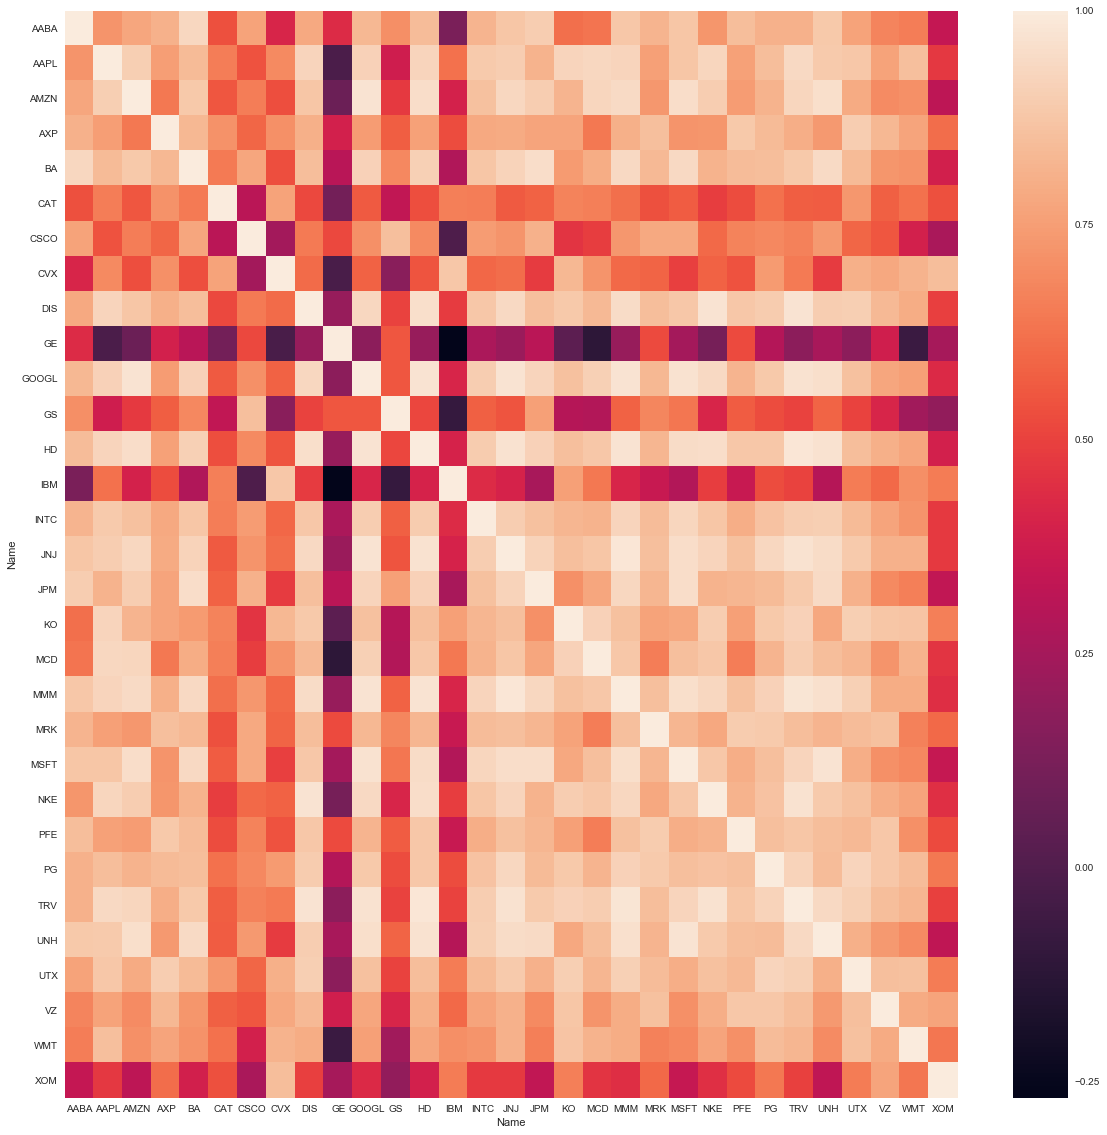

In [54]:
corr = df.pivot('Date', 'Name', 'Growth').corr()
sns.heatmap(corr)